## Разбор практического задания №4 по теме "Сверточные нейронные сети".

### Задание:

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

2. оценить рост точности при увеличении ширины сети (больше фильтров)

3. оценить рост точности при увеличении глубины сети (больше слоев)

4. *  сравнить с точностью полносвязной сети для этой выборки

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [ ]:
tf.random.set_seed(1)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [ ]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

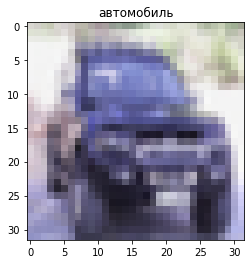

In [ ]:
N = 9

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

### 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10


In [ ]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_106 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_61 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_107 (Activation)  (None, 30, 30, 32)       0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_47 (Dropout)        (None, 15, 15, 32)        0         
                                                     

In [ ]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 13s 15ms/step - loss: 1.9544 - accuracy: 0.2390 - val_loss: 1.8010 - val_accuracy: 0.3341
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.7021 - accuracy: 0.3494 - val_loss: 1.5320 - val_accuracy: 0.4148
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 1.5969 - accuracy: 0.4010 - val_loss: 1.4018 - val_accuracy: 0.4697
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 1.4991 - accuracy: 0.4425 - val_loss: 1.3706 - val_accuracy: 0.4829
Epoch 5/10
782/782 [==============================] - 11s 15ms/step - loss: 1.4289 - accuracy: 0.4739 - val_loss: 1.2431 - val_accuracy: 0.5447
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.3731 - accuracy: 0.5010 - val_loss: 1.2307 - val_accuracy: 0.5428
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 1.3148 - accuracy: 0.5241 - val_loss: 1.1422 - val_accuracy:

In [ ]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 7s - loss: 0.9724 - accuracy: 0.6519 - 7s/epoch - 5ms/step
313/313 - 2s - loss: 1.0145 - accuracy: 0.6325 - 2s/epoch - 5ms/step
train_loss: 0.9724322557449341, train_accuracy: 0.6518599987030029
test_loss: 1.0145212411880493, test_accuracy: 0.6324999928474426


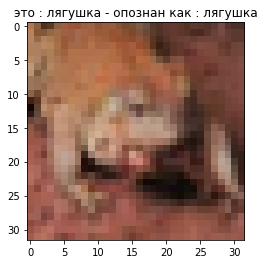

In [ ]:
N = 5
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 2. Оценить рост точности при увеличении ширины сети (больше фильтров)

In [ ]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_113 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_65 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 activation_114 (Activation)  (None, 30, 30, 64)       0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 15, 15, 64)        0         
                                                     

In [ ]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 20s 24ms/step - loss: 1.9432 - accuracy: 0.2407 - val_loss: 1.7121 - val_accuracy: 0.3591
Epoch 2/10
782/782 [==============================] - 19s 24ms/step - loss: 1.6211 - accuracy: 0.3836 - val_loss: 1.4226 - val_accuracy: 0.4690
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 1.4437 - accuracy: 0.4699 - val_loss: 1.2348 - val_accuracy: 0.5417
Epoch 4/10
782/782 [==============================] - 19s 24ms/step - loss: 1.3148 - accuracy: 0.5259 - val_loss: 1.1162 - val_accuracy: 0.5882
Epoch 5/10
782/782 [==============================] - 19s 24ms/step - loss: 1.2125 - accuracy: 0.5705 - val_loss: 1.0249 - val_accuracy: 0.6346
Epoch 6/10
782/782 [==============================] - 19s 24ms/step - loss: 1.1357 - accuracy: 0.6044 - val_loss: 0.9395 - val_accuracy: 0.6634
Epoch 7/10
782/782 [==============================] - 19s 24ms/step - loss: 1.0714 - accuracy: 0.6230 - val_loss: 0.9066 - val_accuracy:

In [ ]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 9s - loss: 0.6993 - accuracy: 0.7526 - 9s/epoch - 6ms/step
313/313 - 2s - loss: 0.7994 - accuracy: 0.7219 - 2s/epoch - 6ms/step
train_loss: 0.6992881894111633, train_accuracy: 0.7526199817657471
test_loss: 0.7994467616081238, test_accuracy: 0.7218999862670898


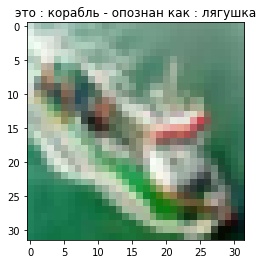

In [ ]:
N = 15
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 3. Оценить рост точности при увеличении глубины сети (больше слоев)

In [ ]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_120 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_69 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_121 (Activation)  (None, 30, 30, 32)       0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_53 (Dropout)        (None, 15, 15, 32)        0         
                                                     

In [ ]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))                       

Epoch 1/10
782/782 [==============================] - 15s 17ms/step - loss: 1.9673 - accuracy: 0.2319 - val_loss: 1.6351 - val_accuracy: 0.3699
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 1.6646 - accuracy: 0.3663 - val_loss: 1.4870 - val_accuracy: 0.4206
Epoch 3/10
782/782 [==============================] - 13s 17ms/step - loss: 1.5311 - accuracy: 0.4258 - val_loss: 1.3402 - val_accuracy: 0.5002
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 1.4262 - accuracy: 0.4777 - val_loss: 1.2010 - val_accuracy: 0.5625
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 1.3254 - accuracy: 0.5266 - val_loss: 1.0879 - val_accuracy: 0.6095
Epoch 6/10
782/782 [==============================] - 14s 17ms/step - loss: 1.2405 - accuracy: 0.5652 - val_loss: 1.0071 - val_accuracy: 0.6448
Epoch 7/10
782/782 [==============================] - 17s 21ms/step - loss: 1.1686 - accuracy: 0.5952 - val_loss: 1.0029 - val_accuracy:

In [ ]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 9s - loss: 0.7774 - accuracy: 0.7252 - 9s/epoch - 6ms/step
313/313 - 2s - loss: 0.8797 - accuracy: 0.6908 - 2s/epoch - 5ms/step
train_loss: 0.7774147391319275, train_accuracy: 0.7252200245857239
test_loss: 0.8796683549880981, test_accuracy: 0.6908000111579895


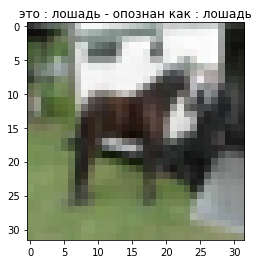

In [ ]:
N = 20
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 4. Полносвязная сеть для этой выборки

In [ ]:
# конфигурирование слоев нейросети
model_4 = Sequential()

# полносвязные слои нейронной сети
model_4.add(Flatten(input_shape=X_train.shape[1:]))
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dense(256))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()
# компиляция модели
model_4.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_55 (Dense)            (None, 512)               1573376   
                                                                 
 activation_129 (Activation)  (None, 512)              0         
                                                                 
 dense_56 (Dense)            (None, 256)               131328    
                                                                 
 activation_130 (Activation)  (None, 256)              0         
                                                                 
 dropout_57 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 10)              

In [ ]:
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 2.0061 - accuracy: 0.2675 - val_loss: 1.8074 - val_accuracy: 0.3440
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.7926 - accuracy: 0.3571 - val_loss: 1.6810 - val_accuracy: 0.3996
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.7196 - accuracy: 0.3884 - val_loss: 1.6287 - val_accuracy: 0.4204
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6576 - accuracy: 0.4087 - val_loss: 1.6065 - val_accuracy: 0.4275
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6244 - accuracy: 0.4227 - val_loss: 1.5667 - val_accuracy: 0.4445
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6018 - accuracy: 0.4302 - val_loss: 1.5309 - val_accuracy: 0.4568
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 1.5775 - accuracy: 0.4388 - val_loss: 1.5228 - val_accuracy: 0.4560
Epoch 

In [ ]:
train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(4)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 4s - loss: 1.4580 - accuracy: 0.4800 - 4s/epoch - 3ms/step
313/313 - 1s - loss: 1.5215 - accuracy: 0.4561 - 907ms/epoch - 3ms/step
train_loss: 1.4580318927764893, train_accuracy: 0.47995999455451965
test_loss: 1.5215072631835938, test_accuracy: 0.4560999870300293


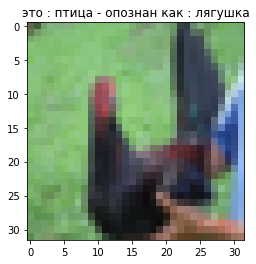

In [ ]:
N = 25
y_p = model_4.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [ ]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc

In [ ]:
results

,step,desc,train_acc,test_acc
0,1,Базовая модель,0.65,0.63
1,2,Шире - больше каналов,0.75,0.72
2,3,Глубже - больше слоев,0.73,0.69
3,4,Полносвязная сеть,0.48,0.46


### Выводы:<br>
* увеличение количества каналов, т.е. увеличение итогового количества признаков, увеличило значение метрики;
* увеличение глубины сети тоже увеличило метрику качества, но это всё равно ниже, чем с большом кол-вом каналов;
* полносвязная сеть без сверточных слоев показывает качество ниже, чем базовая модель со сверточными слоями.